<a href="https://colab.research.google.com/github/ChihabEddine98/DL_course/blob/main/cifar10_cnn_vs_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.layers import Dense, Flatten, Dropout,MaxPooling2D
import keras.layers
from keras.layers import Conv2D
from tensorflow.keras.utils import to_categorical,plot_model
from keras import Sequential,Input

In [2]:
def plots(epochs , history):
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches((12,5))
    ax[0].plot(epochs, history['acc'] , 'g' , label = 'Train acc')
    ax[0].plot(epochs, history['val_acc'],'m',label = 'Val acc')
    ax[0].set_title('Accuracy History ')
    ax[0].legend()

    ax[1].plot(epochs, history['loss'] , 'r',label = 'Train loss')
    ax[1].plot(epochs, history['val_loss'],'c',label = 'Val loss')
    ax[1].set_title('Loss History ')
    ax[1].legend()

    fig.show()

# 01)-Deep Conv Net

In [3]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

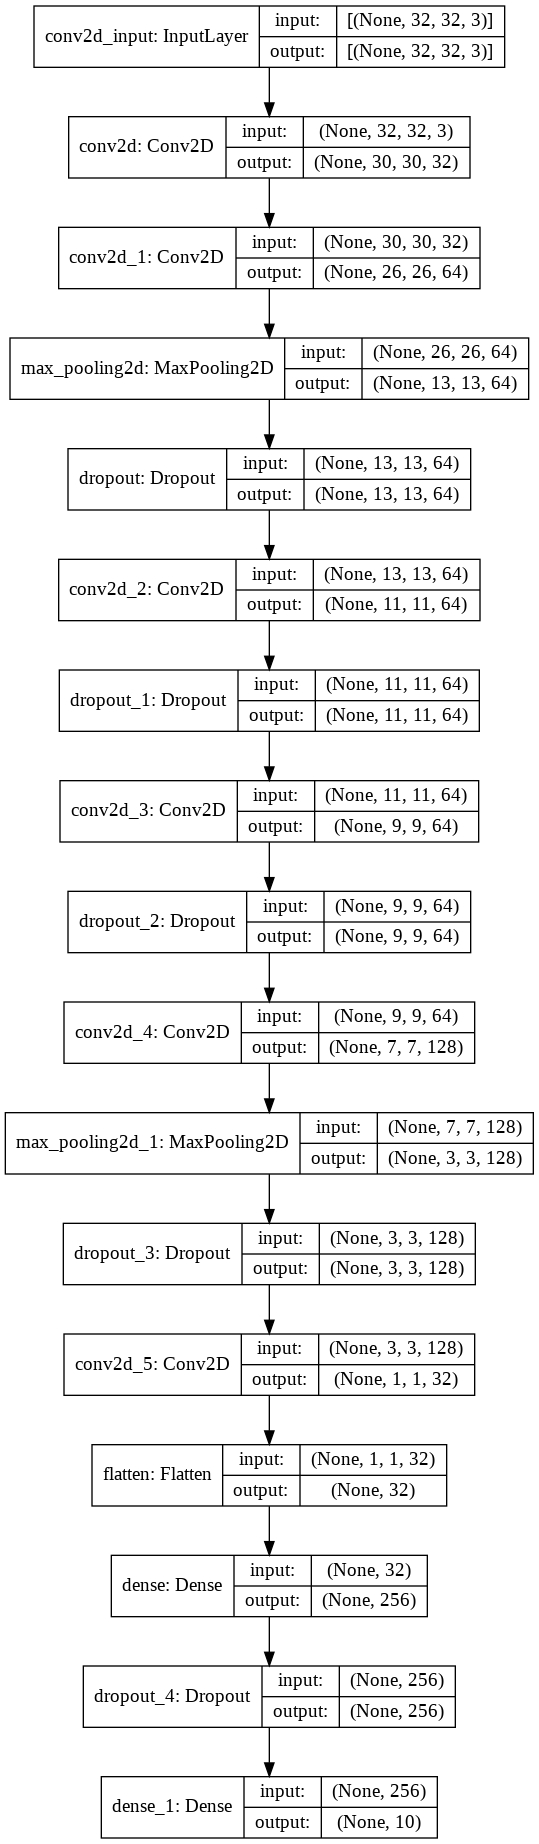

In [4]:
plot_model(model, 'Deep-CNN-CIFAR10.png', show_shapes=True)

In [5]:
# Train DCNN
with tf.device('/device:GPU:0'):
     history = model.fit(train_images, train_labels, batch_size=256, epochs=10, verbose=1, validation_split = 0.1).history

Epoch 1/10
176/176 [==============================] - 13s 60ms/step - loss: 2.0033 - acc: 0.2366 - val_loss: 1.7142 - val_acc: 0.3562
Epoch 2/10
176/176 [==============================] - 9s 53ms/step - loss: 1.6029 - acc: 0.4042 - val_loss: 1.4356 - val_acc: 0.4756
Epoch 3/10
176/176 [==============================] - 9s 53ms/step - loss: 1.4014 - acc: 0.4854 - val_loss: 1.2305 - val_acc: 0.5504
Epoch 4/10
176/176 [==============================] - 9s 53ms/step - loss: 1.2665 - acc: 0.5408 - val_loss: 1.1205 - val_acc: 0.6070
Epoch 5/10
176/176 [==============================] - 9s 53ms/step - loss: 1.1691 - acc: 0.5829 - val_loss: 1.0480 - val_acc: 0.6226
Epoch 6/10
176/176 [==============================] - 9s 53ms/step - loss: 1.0855 - acc: 0.6109 - val_loss: 0.9485 - val_acc: 0.6614
Epoch 7/10
176/176 [==============================] - 9s 53ms/step - loss: 1.0275 - acc: 0.6373 - val_loss: 0.8970 - val_acc: 0.6796
Epoch 8/10
176/176 [==============================] - 9s 53ms/step -

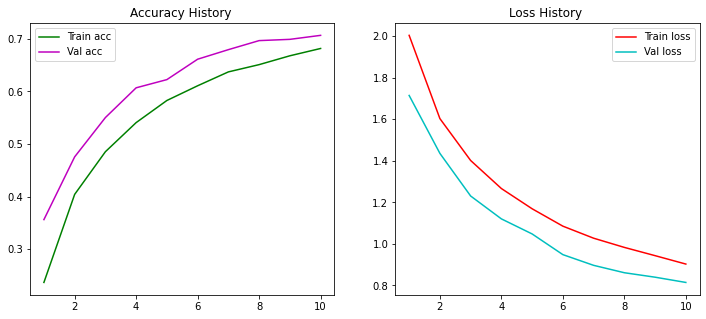

In [6]:
plots(range(1,11), history)

# 02)- Resnets

In [7]:
from tensorflow.keras import layers

def residual_model(num_blocks):
  input = layers.Input(shape=(32, 32, 3))
  x = layers.Conv2D(64, 1, activation='relu', padding='same')(input)

  for _ in range(num_blocks):
    ident = x
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.add([ident,x])

  
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Dropout(0.5)(x)

  x = layers.Flatten()(x)
  x = layers.Dense(10,activation='softmax')(x)
  model = tf.keras.models.Model(inputs=input, outputs=x)
  return model 

res_model = residual_model(5)
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


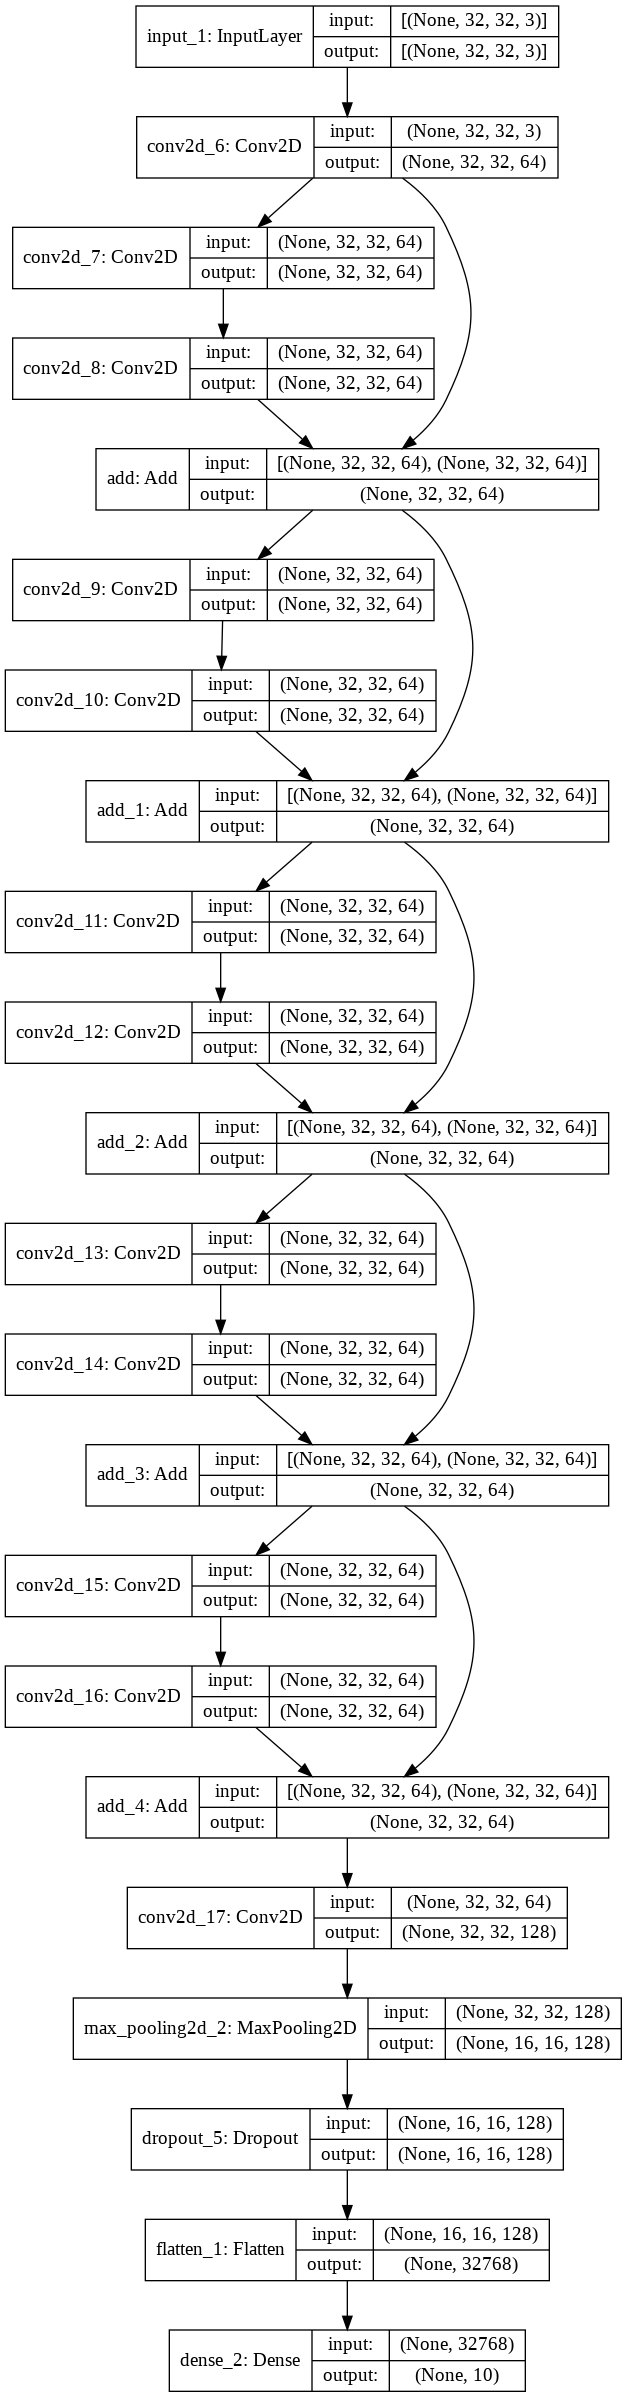

In [8]:
plot_model(res_model, 'Deep-ResNet-CIFAR10.png', show_shapes=True)

In [9]:
# Train ResNet
with tf.device('/device:GPU:0'):  
     res_history = res_model.fit(train_images, train_labels, batch_size=256, epochs=10, verbose=1, validation_split = 0.1).history

Epoch 1/10
176/176 [==============================] - 68s 372ms/step - loss: 1.7097 - acc: 0.3853 - val_loss: 1.3349 - val_acc: 0.5352
Epoch 2/10
176/176 [==============================] - 63s 361ms/step - loss: 1.2387 - acc: 0.5619 - val_loss: 1.1302 - val_acc: 0.6178
Epoch 3/10
176/176 [==============================] - 63s 361ms/step - loss: 1.0681 - acc: 0.6240 - val_loss: 0.9767 - val_acc: 0.6594
Epoch 4/10
176/176 [==============================] - 63s 361ms/step - loss: 0.9517 - acc: 0.6661 - val_loss: 0.9362 - val_acc: 0.6820
Epoch 5/10
176/176 [==============================] - 63s 361ms/step - loss: 0.8723 - acc: 0.6943 - val_loss: 0.8678 - val_acc: 0.7060
Epoch 6/10
176/176 [==============================] - 63s 361ms/step - loss: 0.8011 - acc: 0.7206 - val_loss: 0.8295 - val_acc: 0.7114
Epoch 7/10
176/176 [==============================] - 63s 360ms/step - loss: 0.7494 - acc: 0.7403 - val_loss: 0.8109 - val_acc: 0.7260
Epoch 8/10
176/176 [==============================] - 6

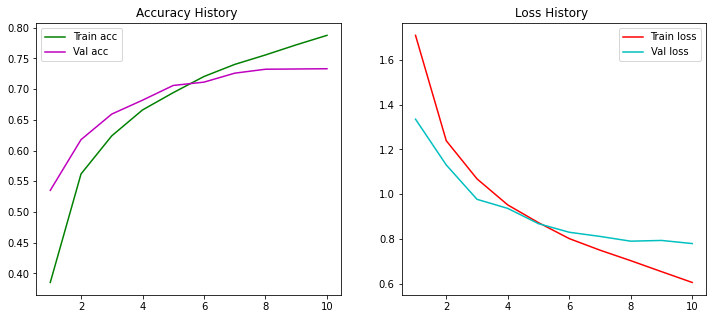

In [10]:
plots(range(1,11), res_history)